<a href="https://colab.research.google.com/github/estefaniabrito/SYS/blob/main/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidad Nacional de Colombia Sede Manizales

Estefania Ramirez Brito

Taller 2 Señales y sistemas

#Solución al punto 2.1
Las series de Fourier y las transformadas de Fourier permiten analizar señales en el dominio de la frecuencia, pero presentan diferencias importantes. La serie de Fourier se utiliza para representar señales periódicas y puede expresarse en forma exponencial, trigonométrica o compacta, descomponiendo la señal en una suma infinita de términos sinusoidales. En contraste, la transformada de Fourier se aplica a señales no periódicas, proporcionando una representación continua en frecuencia. La transformada de Fourier en tiempo discreto (DTFT) es una extensión para señales discretas, generando un espectro continuo y periódico, mientras que la transformada discreta de Fourier (DFT) produce un espectro discreto y finito, útil para el procesamiento digital de señales.

Las distintas combinaciones entre señales y espectros permiten analizar el comportamiento de sistemas en distintos dominios. Una señal continua puede tener un espectro continuo o discreto, dependiendo de su periodicidad, mientras que una señal discreta puede dar lugar a espectros con periodicidad en frecuencia. El algoritmo Fast Fourier Transform (FFT) optimiza el cálculo de la DFT, reduciendo significativamente el costo computacional al emplear técnicas recursivas que disminuyen la cantidad de operaciones necesarias, lo que resulta fundamental para el análisis eficiente de señales en tiempo real.

Por otro lado, en un rectificador de onda completa, el comportamiento varía según la carga. Con una carga netamente resistiva, la corriente y el voltaje están en fase, lo que implica que la señal de salida mantiene la forma de la rectificada. En cambio, cuando la carga incluye un componente capacitivo en serie, la respuesta del circuito cambia debido al desfase introducido por la reactancia capacitiva, lo que afecta la forma de la corriente y suaviza la señal de salida por efecto de filtrado.

#Solución al punto 2.4
¡Claro! Aquí tienes el texto adaptado para que sea compatible con **Google Colab** en la sección de texto (usando Markdown y LaTeX para fórmulas):

---

### Distorsión Total de Armónicos (THD)

La **Distorsión Total de Armónicos (THD, por sus siglas en inglés)** es una medida utilizada en circuitos eléctricos para cuantificar la distorsión en una señal, causada por la presencia de armónicos. Los armónicos son componentes de frecuencia que son múltiplos enteros de la frecuencia fundamental de la señal (por ejemplo, 50 Hz o 60 Hz en sistemas de potencia). El THD se expresa como un porcentaje y se define como la relación entre la suma de las potencias de todos los componentes armónicos y la potencia de la frecuencia fundamental.

#### Fórmula del THD:
$
THD(\%) = \frac{\sqrt{V_2^2 + V_3^2 + V_4^2 + \dots}}{V_1} \times 100$

Donde:
- \$(V_1\$) es la amplitud de la frecuencia fundamental.
- \$(V_2, V_3, V_4, \dots\$) son las amplitudes de los armónicos de segundo, tercer, cuarto orden, etc.

---

### Factor de Potencia (PF)

El **Factor de Potencia (PF)** es una medida de la eficiencia con la que se utiliza la energía eléctrica en un circuito. Se define como la relación entre la potencia activa (útil) y la potencia aparente (total suministrada). En un circuito ideal sin distorsión, el factor de potencia es igual a 1 (o 100%). Sin embargo, en presencia de armónicos, el factor de potencia se ve afectado.

#### Fórmula del Factor de Potencia:
\[$
PF = \frac{P}{S}
$\]
Donde:
- \(P\) es la potencia activa (en vatios, W).
- \(S\) es la potencia aparente (en voltiamperios, VA).

En circuitos con distorsión armónica, el factor de potencia se divide en dos componentes:
1. **Factor de Potencia de Desplazamiento (DPF)**: Relacionado con el desfase entre la tensión y la corriente.
2. **Factor de Potencia de Distorsión (DPF)**: Relacionado con la distorsión armónica.

El factor de potencia total se calcula como:
\$[
PF = DPF \times \sqrt{\frac{1}{1 + THD^2}}
\$]

---

### Cálculo del THD desde la FFT

La **Transformada Rápida de Fourier (FFT)** es una herramienta matemática que permite descomponer una señal en sus componentes de frecuencia. Para calcular el THD utilizando la FFT, sigue estos pasos:

1. **Muestreo de la señal**: Obtén una muestra de la señal en el dominio del tiempo.
2. **Aplicar la FFT**: Aplica la FFT a la señal para obtener su espectro de frecuencia.
3. **Identificar amplitudes**: Identifica la amplitud de la frecuencia fundamental (\$(V_1\$)) y las amplitudes de los armónicos (\$(V_2, V_3, \dots\)$).
4. **Calcular el THD**: Usa la fórmula del THD mencionada anteriormente.


### Cálculo de la Distorsión del Factor de Potencia con Base al THD

La distorsión del factor de potencia causada por los armónicos puede estimarse utilizando el THD. La relación entre el factor de potencia y el THD se expresa como:

\$[
PF = \frac{1}{\sqrt{1 + THD^2}}
\$]
Donde:
- \(THD\) es la distorsión total de armónicos en tanto por uno (no en porcentaje).

Si el THD es alto, el factor de potencia se reduce significativamente, lo que indica una mayor distorsión en el circuito.



In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.optimize as opt
import sympy as sym

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R*C*s + 1) * X

#Realizamos el código para pedir al usuario el tipo de circuito que desea ademas de la amplitud, la frecuencia y valores que desea tener
while True:
    print("Seleccione (1) o (2)")
    print("(1): Circuito RC serie")
    print("(2): Circuito R puro")
    circuito = int(input("Ingrese su opción: "))

    if circuito == 1:
        R_v = float(input("Ingrese el valor de R (Ω): "))
        C_v = float(input("Ingrese el valor de C (F): "))
        Y_RC = Y.subs(R, R_v).subs(C, C_v)
        print(f"La respuesta del circuito RC es: {Y_RC}")
        break
    elif circuito == 2:
        R_v = float(input("Ingrese el valor de R (Ω): "))
        C_v = 0
        Y_R = Y.subs(R, R_v).subs(C,C_v)
        print(f"La respuesta del circuito R puro es: {Y_R}")
        break
    else:
        print("Opción no válida. Intente nuevamente.")

# Aquí pedimos los valores de amplitud y frecuencia
A = float(input("Ingrese la amplitud de la señal: "))
Fo = float(input("Ingrese la frecuencia de la señal de alimentación (Hz): "))

# Calculamos la frecuencia de muestreo, periodo y tiempo de muestreo
Fs = 100 * Fo  # frecuencia de muestreo (Hz)
To = 1 / Fo  # periodo fundamental (s)
Ts = 1 / Fs  # periodo muestreo (s)

# Creamos el vector de tiempo
t = np.arange(0, 5 * To, Ts)  # se simulan 5 períodos de alimentación

# Función de entrada aproximada como onda cosenoidal rectificada completa
in_o = A * (np.sin(2 * np.pi * Fo * t))

# Función tren de pulsos para simular señal rectificada
rec_c = sig.square(2 * np.pi * Fo * t)

# Señal de entrada rectificada
in_ = in_o * rec_c

# Evaluar salida ante entrada rectificada mediante aproximación numérica de scipy
num = np.array([1])  # coeficientes del numerador de la función de transferencia como numpy array
den = np.array([R_v * C_v, 1])  # coeficientes del denominador de la función de transferencia
G_n = sig.TransferFunction(num, den)  # función de transferencia
out = G_n.output(in_, T=t)[1]

# Graficamos las señales
plt.plot(t, in_o, label='Alimentación')
plt.legend()
plt.show()

plt.plot(t, rec_c, label='Tren de Pulsos')
plt.legend()
plt.show()

plt.plot(t, in_, label='In(t)')  # entrada rectificada
plt.plot(t, out, label='Out(t)') # salida del circuito
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

# Cálculo del espectro con fft
vfre = np.fft.rfftfreq(len(out), 1 / Fs)  # vector de frecuencia en Hz según tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.stem(vfre, abs(Xf / len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('')
plt.show()

#Solución al punto 2.5




### Modulación por Amplitud (AM) por Detección Coherente

La **modulación por amplitud (AM)** es una técnica utilizada en comunicaciones para transmitir información a través de una señal portadora de alta frecuencia, variando su amplitud en función de una señal de baja frecuencia llamada **señal mensaje**. La **detección coherente** es un método para demodular señales AM que requiere el uso de una portadora local en el receptor, sincronizada en fase y frecuencia con la portadora utilizada en la modulación.

#### Proceso de Modulación AM:
1. **Señal portadora**: Una onda sinusoidal de alta frecuencia $\(c(t) = A_c \cos(2\pi f_c t)\$).
2. **Señal mensaje**: La información a transmitir (\$(m(t)\$)).
3. **Señal modulada**: La señal AM se obtiene multiplicando la señal mensaje por la portadora y sumando un término de desplazamiento:
   \$[
   s(t) = A_c [1 + k_a m(t)] \cos(2\pi f_c t)
   \$]
   Donde:
   - \$(A_c\$) es la amplitud de la portadora.
   - \$(k_a\$) es el **índice de modulación** (controla la profundidad de la modulación).
   - \$(m(t)\$) es la señal mensaje.

#### Detección Coherente:
Para demodular la señal AM, se multiplica la señal modulada por una portadora local sincronizada y se filtra la componente de baja frecuencia:
\[$
s_d(t) = s(t) \cdot \cos(2\pi f_c t)
$\]
Luego, se aplica un filtro paso bajo para recuperar la señal mensaje original.

#### Aplicaciones:
- Transmisión de radio AM.
- Comunicaciones analógicas.
- Sistemas de telemetría.


### Ejemplo en Python

A continuación, se presenta un ejemplo en Python que genera y grafica señales AM en el tiempo y en frecuencia para dos tipos de señales mensaje: un pulso rectangular y un coseno. El usuario puede definir el índice de modulación.



Ingrese el índice de modulación: 3


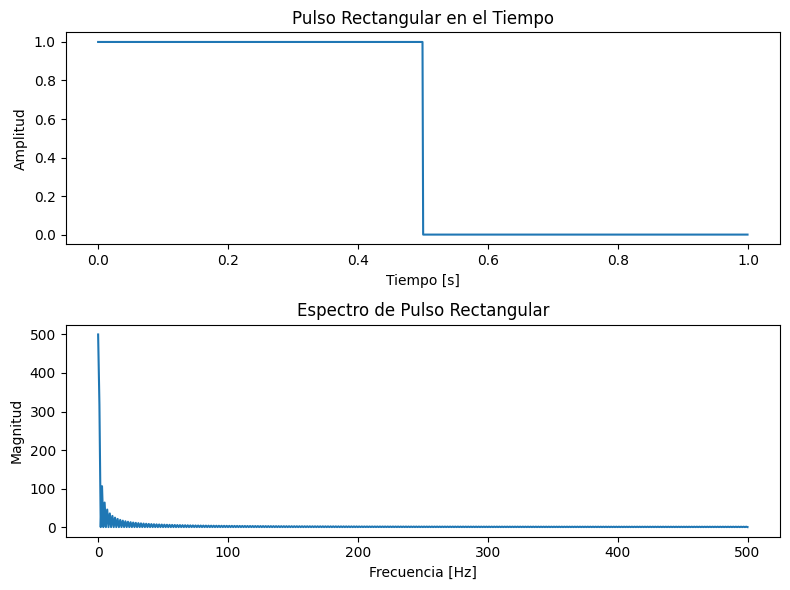

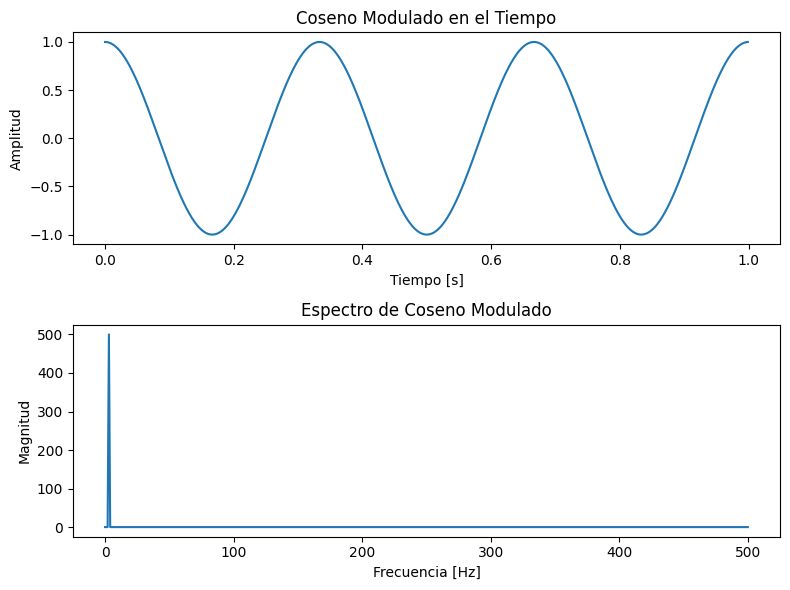

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

def generate_signals(modulation_index, fs=1000, T=1):
    t = np.linspace(0, T, fs*T, endpoint=False)
    pulse_signal = np.where((t < T/2), 1, 0)
    cosine_signal = np.cos(2 * np.pi * modulation_index * t)
    return t, pulse_signal, cosine_signal

def plot_signal_and_spectrum(t, signal, title, fs):
    N = len(t)
    freq = rfftfreq(N, 1/fs)
    spectrum = np.abs(rfft(signal))

    fig, axs = plt.subplots(2, 1, figsize=(8, 6))
    axs[0].plot(t, signal)
    axs[0].set_title(f'{title} en el Tiempo')
    axs[0].set_xlabel('Tiempo [s]')
    axs[0].set_ylabel('Amplitud')

    axs[1].plot(freq, spectrum)
    axs[1].set_title(f'Espectro de {title}')
    axs[1].set_xlabel('Frecuencia [Hz]')
    axs[1].set_ylabel('Magnitud')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    modulation_index = float(input("Ingrese el índice de modulación: "))
    fs = 1000  # Frecuencia de muestreo
    T = 1      # Duración de la señal en segundos

    t, pulse_signal, cosine_signal = generate_signals(modulation_index, fs, T)

    plot_signal_and_spectrum(t, pulse_signal, "Pulso Rectangular", fs)
    plot_signal_and_spectrum(t, cosine_signal, "Coseno Modulado", fs)
